### Submission for Lee Tanenbaum lt1503 N10886221

The following is my submission. My friend and I were both in the picture, but the system clearly labeled her arm as belonging to my head, even though a human labeler would have never made this mistake

In [1]:
import argparse
import logging
import time
import matplotlib.pyplot as plt
import cv2
import numpy as np

from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

logger = logging.getLogger('TfPoseEstimator-WebCam')
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

fps_time = 0
image = cv2.imread('tf_pose_1906_raw.jpg')


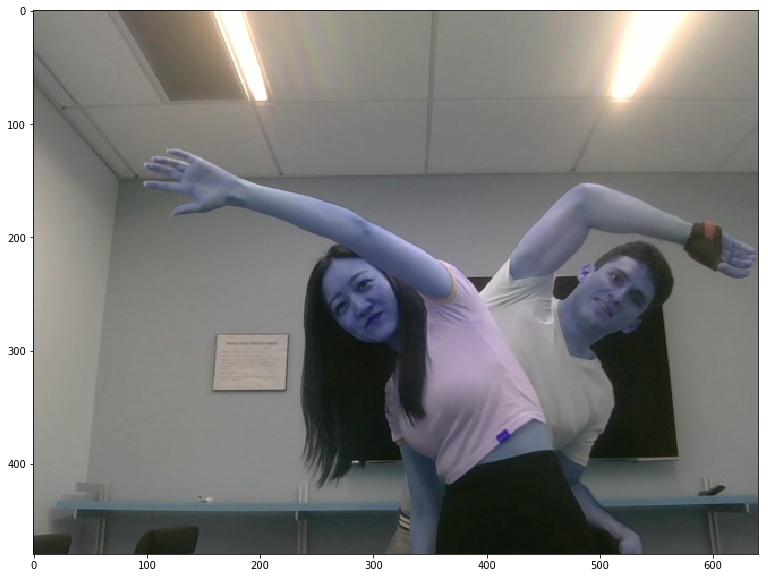

In [2]:

plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.show()

In [3]:
#cv2.imwrite('output_images/tf_pose_' + str(idx) + '_raw.jpg', image)
w, h = 432, 368
e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(w, h))
#logger.debug('image process+')
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4)

#logger.debug('postprocess+')
image_edited = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)



[2018-10-02 18:14:10,603] [TfPoseEstimator] [INFO] loading graph from /home/lee/workspace/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


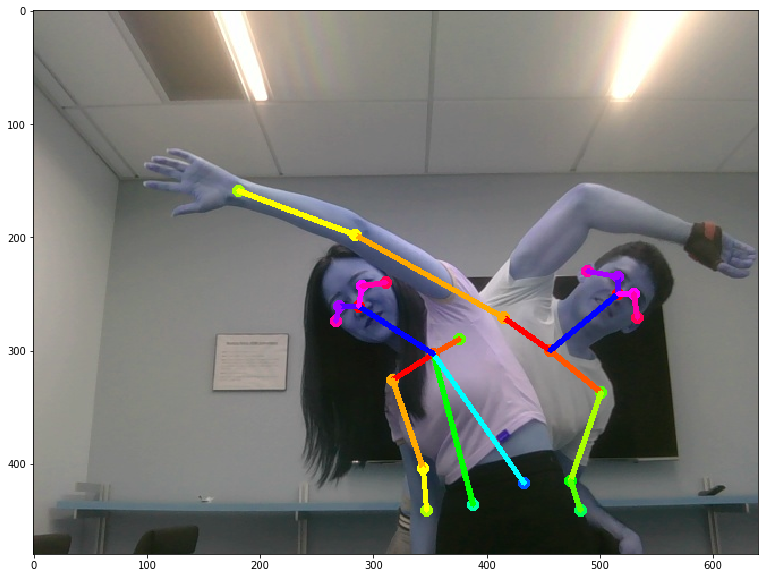

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.imshow(image_edited)
plt.show()